In [ ]:
import re
myString = "/url?q=https://www.quora.com/Is-Vellore-Institute-of-Technology-a-good-college&sa=U&ved=0ahUKEwjN0pSy1uXgAhUJabwKHepDBlUQFggUMAA&usg=AOvVaw0EL1buNf5T-Nzb7su6B6Ra"
print temp

In [26]:
import bs4
import requests
import pandas as pd
import timeit
import re
text = "rank in vit"
search = text.replace(" ", "+")

question_url = "https://www.bing.com/search?q="+search+"+quora"

print question_url

https://www.bing.com/search?q=rank+in+vit+quora


soup is <!DOCTYPE html>
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml" xmlns:web="http://schemas.live.com/Web/"><head><script type="text/javascript">//<![CDATA[
si_ST=new Date
//]]></script><!--pc--><title>rank in vit quora - Bing</title><meta content="text/html; charset=utf-8" http-equiv="content-type"/><meta content="origin-when-cross-origin" name="referrer"/><link href="/search?format=rss&amp;q=rank+in+vit+quora" rel="alternate" title="XML" type="text/xml"/><link href="/search?format=rss&amp;q=rank+in+vit+quora" rel="alternate" title="RSS" type="application/rss+xml"/><link href="/sa/simg/bing_p_rr_teal_min.ico" rel="shortcut icon"/><script type="text/javascript">//<![CDATA[
_G={ST:(si_ST?si_ST:new Date),Mkt:"en-US",RTL:false,Ver:"09",IG:"12804D02B39B439E84A4CB2BE772A96C",EventID:"F521722F9FFF43EBB0AE60B1833502CA",V:"web",P:"SERP",DA:"HK2",CID:"078617AA0E526A0436981ABE0FFE6B3E",SUIH:"c3ynD3VuH80BL5jSwzsEiQ",adc:"b_ad",gpUrl:"\/fd\/ls\/GLinkPing.aspx?" }; _G.lsUrl=
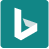

1
I got AIR 124. I was indifferent to the result completely as I never wanted to join VIT. Also, I had performed well enough in JEE-Main 2017 to land into any of the best NITs. I never prepared for the exam as I was only thinking of the preparation for JEE(Advanced) 2017. And let me tell you, I gave the mock test for VIT just half an hour (or so) before the exam. LOL.Later, I asked some of my friends about their VITEEE Results and I came to know that none of them were under 1000. The best I heard was in 3800s. Only then I realized that I had performed quite well. By the way, I will be joining one of the Premier IITs soon.
I got AIR 124. I was indifferent to the result completely as I never wanted to join VIT. Also, I had performed well enough in JEE-Main 2017 to land into any of the best NITs. I never prepared for the exam as I was only thinking of the preparation for JEE(Advanced) 2017. And let me tell you, I gave the mock test for VIT just half an hour (or so) before the exam. LOL.La

In [23]:



headers = {
    
        'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.121 Safari/537.36'
        
    }
proxies = {
    'https': 'http://195.209.131.19:52844'
#     'https': 'http://50.232.162.77:80',
#     'https': 'http://103.111.219.144:53281'
    
}


answers = []
def GoogleSearch(url):
    link = []

    page = requests.get(url, headers=headers)
    response = page.text
    soup = bs4.BeautifulSoup(response, 'lxml')
    print "soup is",soup
    container = soup.find('li',{'class':'b_algo'})
    print "container is",container
    
    for i in container.findAll('a'):
        link.append(i.get('href'))
    return link[0]
# #     start = timeit.timeit()
#     for l in container:
#         link = l.get('href')
#     quora_link = re.findall(r'q=[\'"]?([^\& >]+)', link)
#     quora_link = "".join(quora_link)
#     text = container.getText()
# #     end = timeit.timeit()
# #     print "time taken=",end - start
#     print "text is",text
#     print "link is ",quora_link
#     return text,quora_link

def QuoraSearch(url):
    answers = []
    page = requests.get(url)
    response = page.text
    soup = bs4.BeautifulSoup(response, 'lxml')
    container = soup.find('div',{'class':'ui_qtext_expanded'})
    for p in container:
        answers.append(p.text)
    print len(answers)
    print answers[0]
    return answers[0]
    
quora_link = GoogleSearch(question_url)
print "quora link is",quora_link

quora_answer = QuoraSearch(quora_link)
print quora_answer
# 

In [50]:
temp = quora_answer[:88]
print temp
print quora_answer

I got AIR 124. I was indifferent to the result completely as I never wanted to join VIT.
I got AIR 124. I was indifferent to the result completely as I never wanted to join VIT. Also, I had performed well enough in JEE-Main 2017 to land into any of the best NITs. I never prepared for the exam as I was only thinking of the preparation for JEE(Advanced) 2017. And let me tell you, I gave the mock test for VIT just half an hour (or so) before the exam. LOL.Later, I asked some of my friends about their VITEEE Results and I came to know that none of them were under 1000. The best I heard was in 3800s. Only then I realized that I had performed quite well. By the way, I will be joining one of the Premier IITs soon.


In [51]:
if(len(quora_answer)>300):
    split = temp.split(".")
    print split
    
print ".".join(split[:5])

[u'I got AIR 124', u' I was indifferent to the result completely as I never wanted to join VIT', u'']
I got AIR 124. I was indifferent to the result completely as I never wanted to join VIT.


In [88]:
import bs4
import requests
import pandas as pd
link = []

def list_attribute(container, attr):
  return [item.get(attr) for item in container]

def find_text(container, tag, filter = {}):
  return [item.find(tag, attrs=filter ).text.strip() for item in container]

def scrappe(url):
  # Request
  page = requests.get(url)
  response = page.text
#   print "response is ",response
  # Parse HTML
  soup = bs4.BeautifulSoup(response, 'lxml')
  # Get the result container (<a class="question_link>...</a>")
  container = soup.find('a',{'class':'question_link'})
  print "container is ",container
  # Extract content (find text inside <span> tags)
  texts = find_text(container, 'span')
  print "text is ",texts[0]
  # Extract links (href attribute of links)
#   links = list_attribute(container, "href")
#   print "links=",links[0]
  link = container["href"]
  for p in container:
    
    answers.append(p.text)
  print len(answers)
  # store structured data
#   res = pd.DataFrame()
#   res['link'] = links
#   res['text'] = texts
#   # res.to_csv("results.csv", index=None, sep=';', encoding='utf-8')
#   res.to_json("results.json", orient='records')

scrappe("https://www.quora.com/topic/is-vit-a-good-college")
# 

container is  <a action_mousedown="QuestionLinkClickthrough" class="question_link" href="/What-is-your-review-of-Vellore-Institute-of-Technology" id="__w2_wFazst4e9_link" rel="noopener" target="_blank"><span class="ui_content_title unstyled_ui_title"><span class="ui_qtext_rendered_qtext">What is your review of Vellore Institute of Technology?</span></span></a>
text is  What is your review of Vellore Institute of Technology?
link is  /What-is-your-review-of-Vellore-Institute-of-Technology
2


In [ ]:
container = "<a action_mousedown="QuestionLinkClickthrough" class="question_link" href="/What-is-your-review-of-Vellore-Institute-of-Technology" id="__w2_wqxvzWt357_link" rel="noopener" target="_blank"><span class="ui_content_title unstyled_ui_title"><span class="ui_qtext_rendered_qtext">What is your review of Vellore Institute of Technology?</span></span></a>"
item.get(attr) for item in container

In [36]:
from bs4 import BeautifulSoup
html = '''
... <p>
...     <strong class="offender">YOB:</strong> 1987<br />
...     <strong class="offender">RACE:</strong> WHITE<br />
...     <strong class="offender">GENDER:</strong> FEMALE<br />
...     <strong class="offender">HEIGHT:</strong> 5'05''<br />
...     <strong class="offender">WEIGHT:</strong> 118<br />
...     <strong class="offender">EYE COLOR:</strong> GREEN<br />
...     <strong class="offender">HAIR COLOR:</strong> BROWN<br />
... </p>
'''
soup = BeautifulSoup(html)
print soup.find_all('strong')
for strong_tag in soup.find_all('strong'):
    print strong_tag.text, strong_tag.next_sibling

[<strong class="offender">YOB:</strong>, <strong class="offender">RACE:</strong>, <strong class="offender">GENDER:</strong>, <strong class="offender">HEIGHT:</strong>, <strong class="offender">WEIGHT:</strong>, <strong class="offender">EYE COLOR:</strong>, <strong class="offender">HAIR COLOR:</strong>]
YOB:  1987
RACE:  WHITE
GENDER:  FEMALE
HEIGHT:  5'05''
WEIGHT:  118
EYE COLOR:  GREEN
HAIR COLOR:  BROWN


In [10]:
from lxml.html import fromstring
import requests
from itertools import cycle
import traceback

def get_proxies():
    url = 'https://free-proxy-list.net/'
    response = requests.get(url)
    parser = fromstring(response.text)
    proxies = set()
    for i in parser.xpath('//tbody/tr')[:10]:
        if i.xpath('.//td[7][contains(text(),"yes")]'):
            proxy = ":".join([i.xpath('.//td[1]/text()')[0], i.xpath('.//td[2]/text()')[0]])
            proxies.add(proxy)
    return proxies


#If you are copy pasting proxy ips, put in the list below
#proxies = ['121.129.127.209:80', '124.41.215.238:45169', '185.93.3.123:8080', '194.182.64.67:3128', '106.0.38.174:8080', '163.172.175.210:3128', '13.92.196.150:8080']
proxies = get_proxies()
print proxies
proxy_pool = cycle(proxies)

url = 'https://httpbin.org/ip'
for i in range(1,11):
    #Get a proxy from the pool
    proxy = next(proxy_pool)
    print("Request #%d"%i)
    try:
        response = requests.get(url,proxies={"http": proxy, "https": proxy})
        print(response.json())
    except:
        #Most free proxies will often get connection errors. You will have retry the entire request using another proxy to work. 
        #We will just skip retries as its beyond the scope of this tutorial and we are only downloading a single url 
        print("Skipping. Connnection error")

set([])


StopIteration: 